In [1]:
from faces import *
faces_data, targets = get_lfw_data()

Total dataset size:
	num_samples: 1867
	num_features: 1850
	num_classes: 19


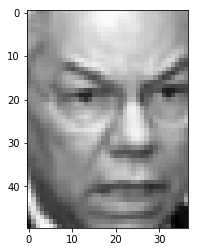

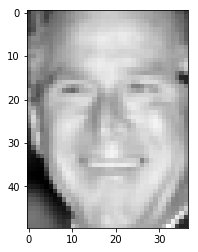

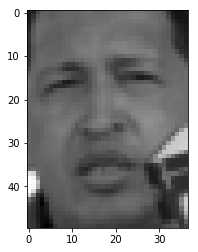

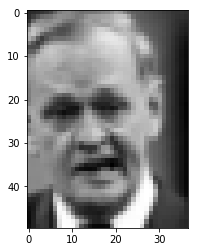

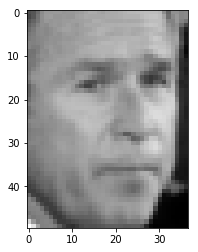

In [2]:
faces = []
num_of_faces_to_examine = 5
for i in range(num_of_faces_to_examine):
    faces.append((faces_data[i+20], targets[i+20]))
    show_image(faces[-1][0])

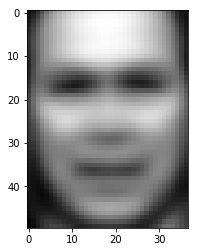

In [3]:
mean_image = np.mean(faces_data, axis=0)
show_image(mean_image)


In [4]:
U, mu = PCA(faces_data)

(1850, 1850)


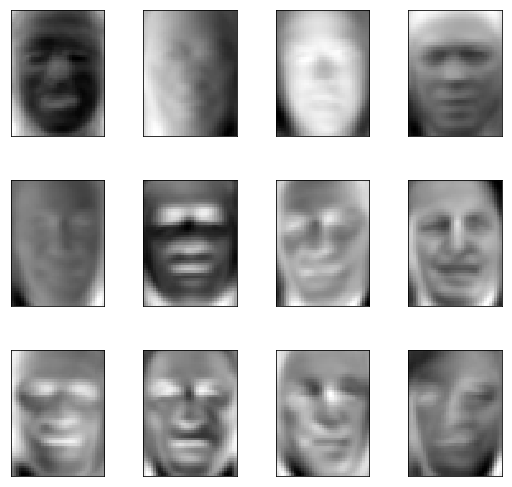

In [5]:
print(U.shape)
#show_image(vec_to_image(U[:,18]))
plot_gallery([vec_to_image(U[:,i]) for i in xrange(12)])

l=1


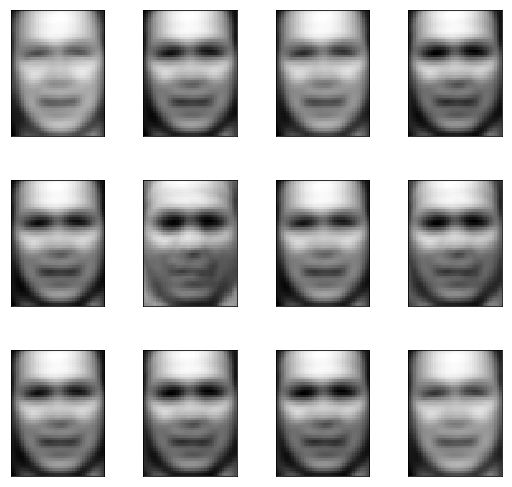

l=10


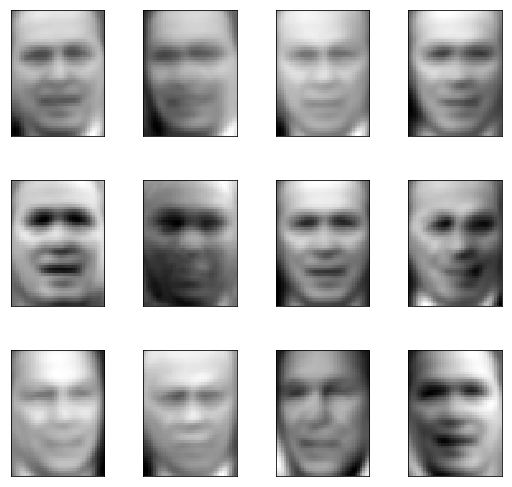

l=50


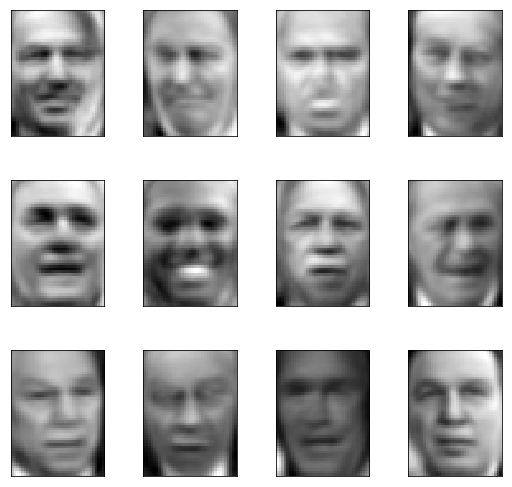

l=100


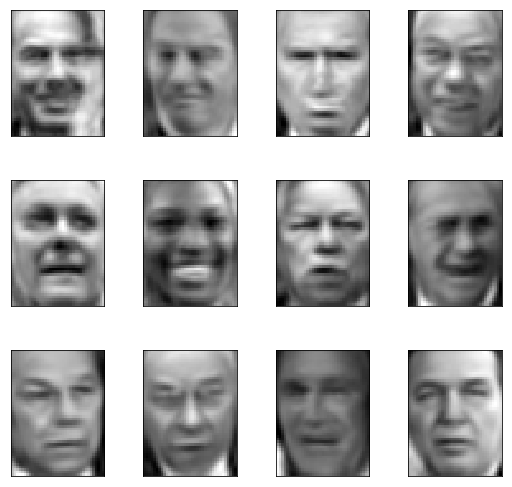

l=500


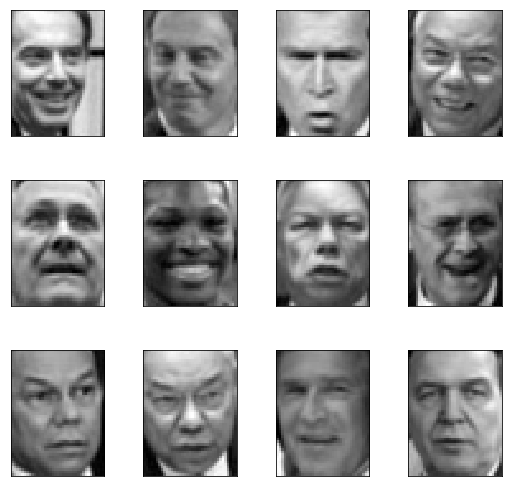

l=1288


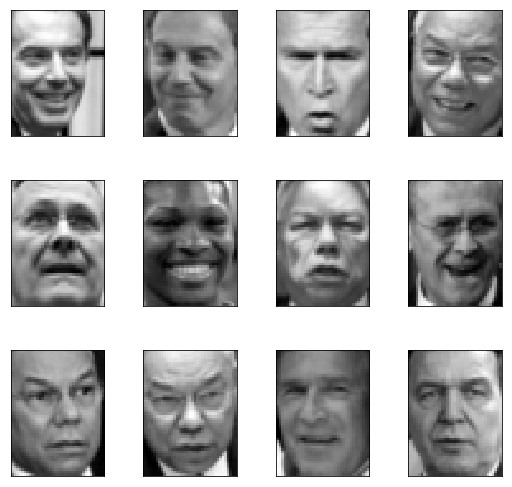

In [6]:
for l in [1, 10, 50, 100, 500, 1288]:
    Z, Ul = apply_PCA_from_Eig(faces_data, U, l, mu)
    faces_data_rec = reconstruct_from_PCA(Z, Ul, mu)
    print("l="+str(l))
    plot_gallery([faces_data_rec[i,:] for i in xrange(12)])

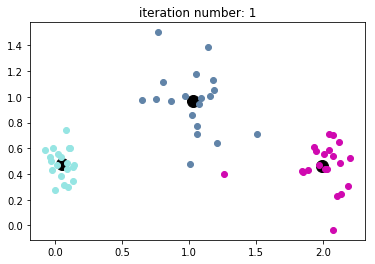

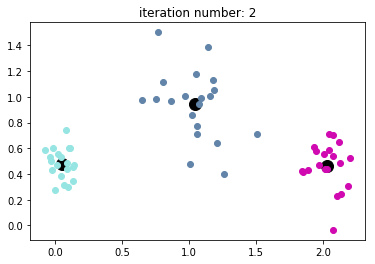

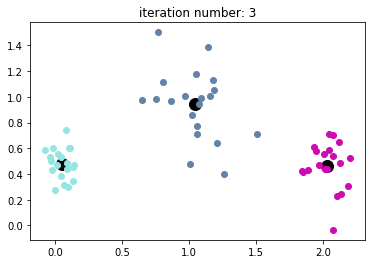

In [7]:
dataset = generate_points_2d(20)

clusters = kMeans(dataset, 3, init='random', plot=True)

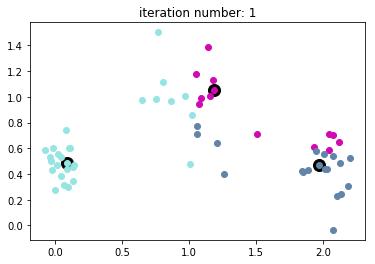

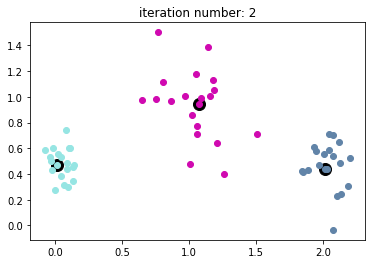

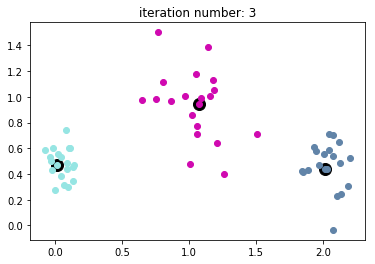

In [10]:
clusters = kMedoids(dataset, 3, init='random', plot=True)

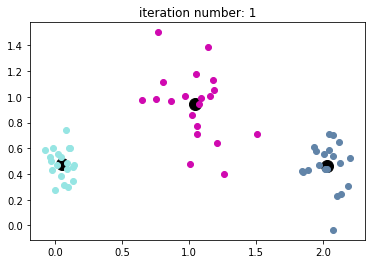

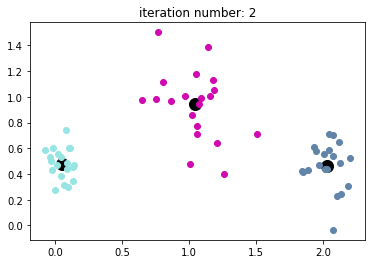

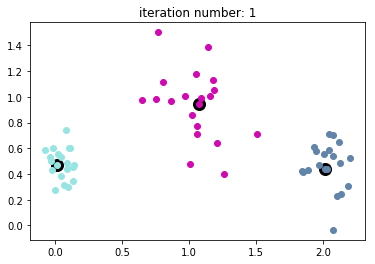

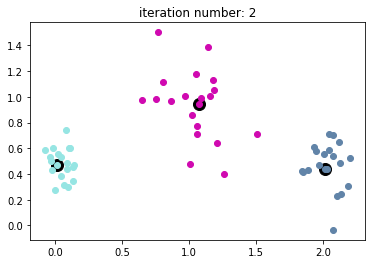

In [11]:
clusters = kMeans(dataset, 3, init='cheat', plot=True)
clusters = kMedoids(dataset, 3, init='cheat', plot=True)

In [13]:
X1, y1 = util.limit_pics(faces_data, targets, [4, 6, 13, 16], 40)
points = build_face_image_points(X1, y1)

In [23]:
import numpy as np
import time
k_means_avg_time = 0
k_means_avg = 0
k_means_min = np.inf
k_means_max = -np.inf

k_medoids_avg_time = 0
k_medoids_avg = 0
k_medoids_min = np.inf
k_medoids_max = -np.inf
for i in range(10):
    begin = time.time()
    clusters = kMeans(points, 4, init='random', plot=False)
    k_means_avg_time += time.time()-begin
    score = clusters.score()
    if score > k_means_max:
        k_means_max=score
    if score < k_means_min:
        k_means_min=score  
    k_means_avg += score
    
    begin = time.time()
    clusters = kMedoids(points, 4, init='random', plot=False)
    k_medoids_avg_time += time.time()-begin
    score = clusters.score()
    if score > k_medoids_max:
        k_medoids_max=score
    if score < k_medoids_min:
        k_medoids_min=score  
    k_medoids_avg += score
    
k_means_avg /= 10
k_medoids_avg /= 10
k_means_avg_time /= 10
k_medoids_avg_time /= 10

print(k_means_avg)
print(k_means_min)
print(k_means_max)
print(k_means_avg_time)

print(k_medoids_avg)
print(k_medoids_min)
print(k_medoids_max)
print(k_medoids_avg_time)

0.5968749999999999
0.50625
0.71875
0.278436875343
0.591875
0.4625
0.71875
0.258426713943


In [46]:
X1, y1 = util.limit_pics(faces_data, targets, [4, 13], 40)

Text(0.5,0,'Number of components')

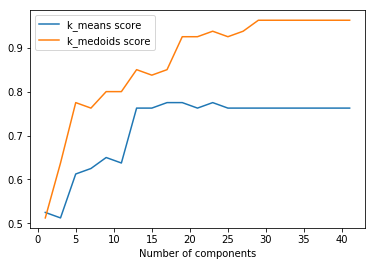

In [48]:
k_means_scores = []
k_medoids_scores = []
ls = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41]
for l in ls:
    Z, Ul = apply_PCA_from_Eig(X1, U, l, mu)
    points = build_face_image_points(Z, y1)
    #print("l="+str(l))
    clusters = kMeans(points, 2, init='cheat', plot=False)
    k_means_scores.append(clusters.score())
    
    clusters = kMedoids(points, 2, init='cheat', plot=False)
    k_medoids_scores.append(clusters.score())
    #plot_gallery([faces_data_rec[i,:] for i in xrange(12)])
    
plt.plot(ls, k_means_scores)
plt.plot(ls, k_medoids_scores)
plt.legend(['k_means score', 'k_medoids score'])
plt.xlabel('Number of components')

In [58]:
min_score = np.inf
worst_pair = [1,2]
max_score = -np.inf
best_pair = [1,2]
for class1 in range(19):
    for class2 in range(19):
        if class1 == class2:
            continue
        X1, y1 = util.limit_pics(faces_data, targets, [class1, class2], 40)
        Z, Ul = apply_PCA_from_Eig(X1, U, 30, mu)
        points = build_face_image_points(Z, y1)
        clusters = kMedoids(points, 2, init='cheat', plot=False)
        score = clusters.score()
        
        if score > max_score:
            max_score = score
            best_pair = [class1, class2]
            
        if score < min_score:
            min_score = score
            worst_pair = [class1, class2]   

print(min_score)
print(worst_pair)

print(max_score)
print(best_pair)

0.5
[3, 7]
0.975
[6, 14]


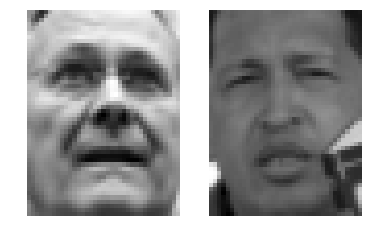

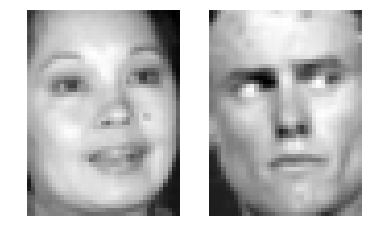

In [64]:
plot_representative_images(faces_data, targets, worst_pair, title = 'similar')
plot_representative_images(faces_data, targets, best_pair, title = 'different')